<center><h1> Multi radar analysis </h1></center>

In [35]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4  
from IPython.parallel import Client

%matplotlib inline

In [36]:
def granule(arg_dict):
    import imp
    kazr_tools = imp.load_source('kazr_tools', '/home/scollis/projects/kazr_tools/code/kazr_tools.py')
    
    in_file = arg_dict['filename']
    log_dir = '/data/radar/output/'
    logfilename = os.path.join(log_dir, in_file.split('/')[-1]+'.log')
    
    fh = open(logfilename, 'w')
    
    fh.write('opening \n')
    radar = pyart.io.read(in_file)
    fh.write('calculating \n')
    units = radar.time['units']
    times = num2date(radar.time['data'], units)
    
    toa_bg =  kazr_tools.snr_toa(radar)
    all_mean =  kazr_tools.mean_snr(radar)
    ns, ms, mb = kazr_tools.describe_radar(radar)
    del(radar)
    fh.write('done \n')
    return units, all_mean, toa_bg, times, ns, ms, mb
    

In [37]:
in_dir = '/data/radar/oli_kazr/'
all_files = os.listdir(in_dir)
good_files = []
for fil in all_files:
    if '.nc' in fil:
        good_files.append(fil)
good_files.sort()

In [38]:
print(len(good_files))

377


In [39]:
packing = []
for fn in good_files:
    this_rec = {'filename' : os.path.join(in_dir, fn)}
    packing.append(this_rec)

In [40]:
My_Cluster = Client()
My_View = My_Cluster[:]
print(My_View)
print(len(My_View))

<DirectView [0, 1, 2, 3,...]>
40


In [41]:
My_View.block = False
My_View.execute('import matplotlib')
My_View.execute('matplotlib.use("agg")')
My_View.execute('import pyart')
My_View.execute('import numpy as np')
My_View.execute('import os')
My_View.execute('from netCDF4 import num2date')




result = My_View.map_async(granule, packing)
qvps = result.get()

In [42]:
times = np.array([item[0] for item in  qvps])
alls = np.array([item[1] for item in  qvps])
toas = np.array([item[2] for item in  qvps])
tarrrs = np.array([item[3] for item in  qvps])
ns = np.array([item[4] for item in  qvps])
ms = np.array([item[5] for item in  qvps])
mb = np.array([item[6] for item in  qvps])


In [43]:
order = np.argsort(times)

In [44]:
time_array = np.array([netCDF4.num2date(0, units = sstr) for sstr in times[order]])

In [45]:
alls_o = np.concatenate(alls[order])
toas_o = np.concatenate(toas[order])
tarrs_o = np.concatenate(tarrrs[order])
ns_o = np.concatenate(ns[order])
ms_o = np.concatenate(ms[order])
mb_o = np.concatenate(mb[order])

In [46]:
print(alls_o)

[-17.48135948 -17.51311874 -17.55259132 ..., -20.68090057 -20.71427155
 -20.72436523]


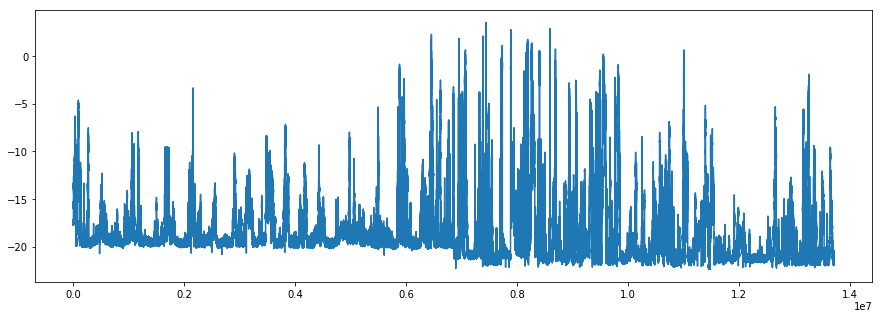

In [47]:
fig = plt.figure(figsize = [15,5])
plt.plot(alls_o)

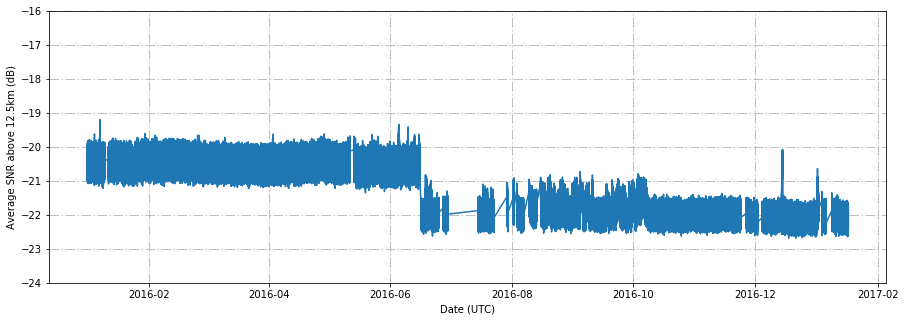

In [54]:
fig = plt.figure(figsize = [15,5])
plt.plot(tarrs_o, toas_o)
plt.ylim([-24,-16])

ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.ylabel('Average SNR above 12.5km (dB)')
plt.xlabel('Date (UTC)')

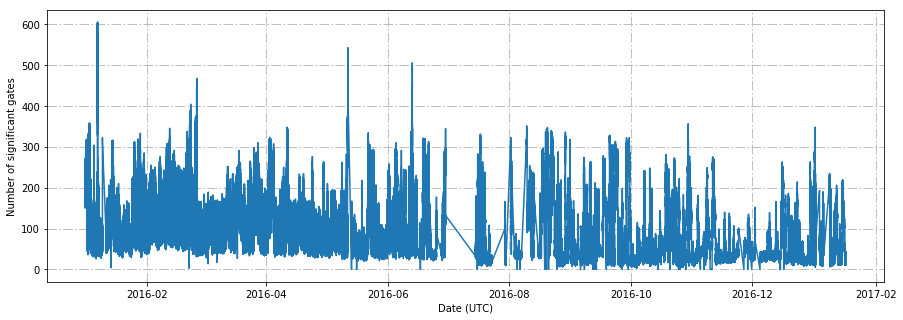

In [61]:
fig = plt.figure(figsize = [15,5])
plt.plot(tarrs_o, ns_o)
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

#plt.ylim([-24,-20])
plt.ylabel('Number of significant gates')
plt.xlabel('Date (UTC)')

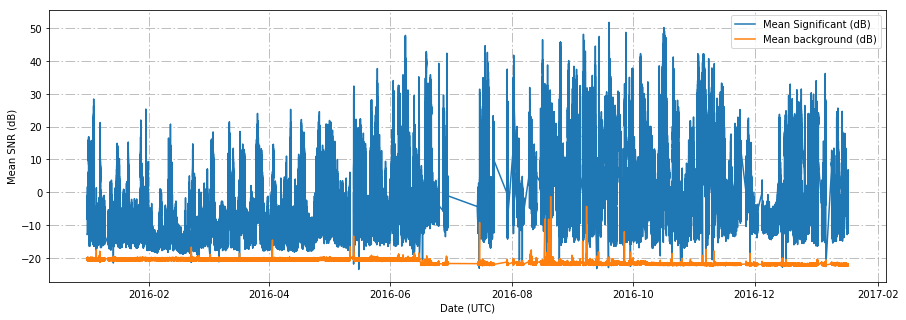

In [62]:
fig = plt.figure(figsize = [15,5])
plt.plot(tarrs_o, ms_o, label='Mean Significant (dB)')
plt.plot(tarrs_o, mb_o, label='Mean background (dB)')
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend()
#plt.ylim([-24,-20])
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')

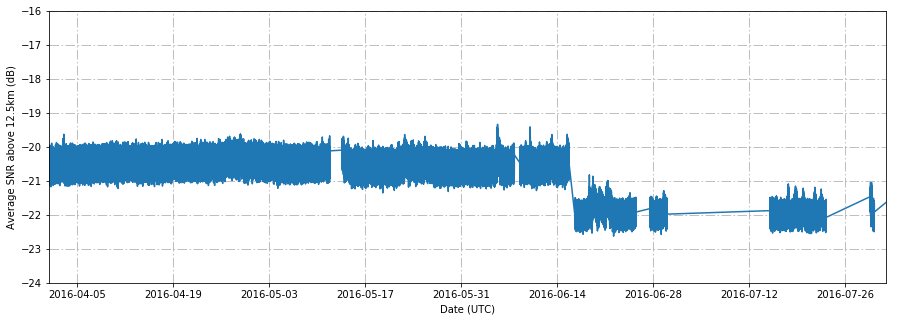

In [63]:
fig = plt.figure(figsize = [15,5])
plt.plot(tarrs_o, toas_o)
plt.ylim([-24,-16])
plt.xlim([netCDF4.datetime(2016, 4, 1,), netCDF4.datetime(2016, 8, 1,)])
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.ylabel('Average SNR above 12.5km (dB)')
plt.xlabel('Date (UTC)')

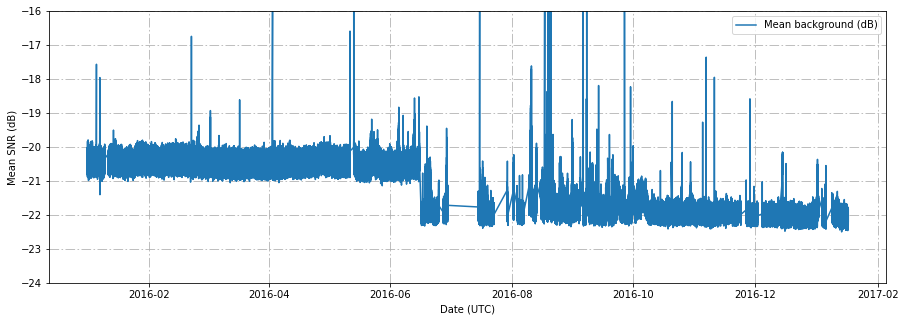

In [64]:
fig = plt.figure(figsize = [15,5])
#plt.plot(tarrs_o, ms_o, label='Mean Significant (dB)')
plt.plot(tarrs_o, mb_o, label='Mean background (dB)')
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')

plt.legend()
plt.ylim([-24,-16])
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')

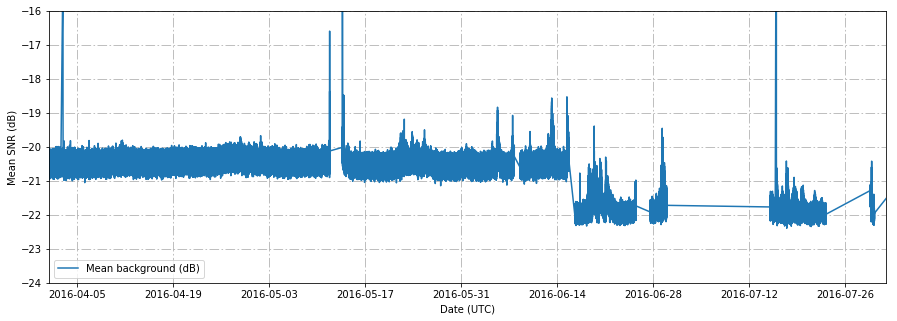

In [65]:
fig = plt.figure(figsize = [15,5])
#plt.plot(tarrs_o, ms_o, label='Mean Significant (dB)')
plt.plot(tarrs_o, mb_o, label='Mean background (dB)')
plt.xlim([netCDF4.datetime(2016, 4, 1,), netCDF4.datetime(2016, 8, 1,)])
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')


plt.legend()
plt.ylim([-24,-16])
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')

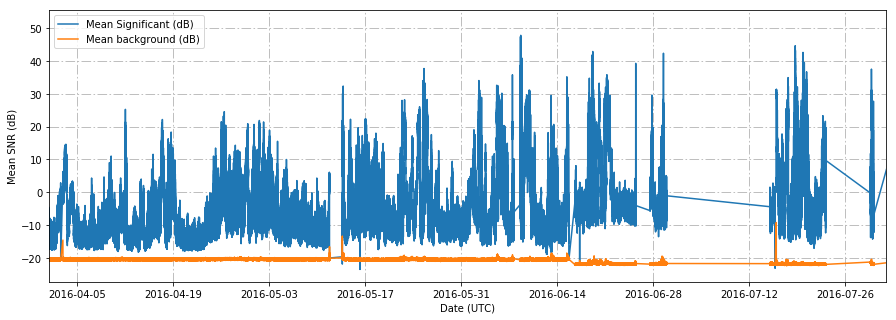

In [66]:
fig = plt.figure(figsize = [15,5])
plt.plot(tarrs_o, ms_o, label='Mean Significant (dB)')
plt.plot(tarrs_o, mb_o, label='Mean background (dB)')
plt.xlim([netCDF4.datetime(2016, 4, 1,), netCDF4.datetime(2016, 8, 1,)])
ax = plt.gca()
ax.grid(True)

gridlines = ax.get_xgridlines() + ax.get_ygridlines()

for line in gridlines:
    line.set_linestyle('-.')


plt.legend()
#plt.ylim([-24,-20])
plt.ylabel('Mean SNR (dB)')
plt.xlabel('Date (UTC)')

In [67]:
import pickle
with open('/home/scollis/oli_kazr.pk', 'wb') as output:
    pickle.dump(qvps, output)
